In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

<class 'numpy.ndarray'>


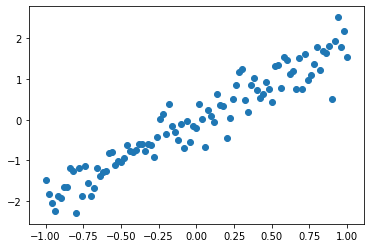

In [2]:
x_train=np.linspace(-1,1,101)
print(type(x_train))
y_train=2*x_train +np.random.randn(*x_train.shape)*0.33
plt.scatter(x_train,y_train)
plt.show()


Tensor("Placeholder:0", dtype=float32)
1.8858197


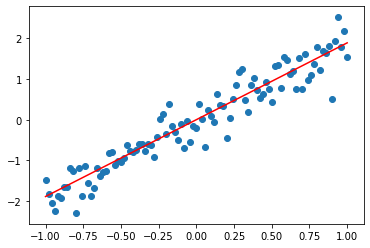

In [3]:
#creating a linear model on the basis of cost function
learning_rate=0.01

X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)
print(X)

def model(X,w):
    return tf.multiply(X,w)

w=tf.Variable(0.0,name="weight")

y_model=model(X,w)
cost=tf.square(Y-y_model)

train_op=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)

for i in range(0,100):
    for (x,y) in zip(x_train,y_train):
        sess.run(train_op,feed_dict={X:x,Y:y})

w_val=sess.run(w)
print(w_val)

sess.close()
plt.scatter(x_train,y_train)
y_learned=x_train*w_val
plt.plot(x_train,y_learned,'r')
plt.show()
        

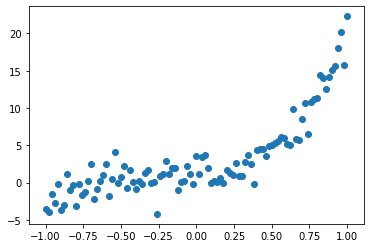

In [3]:
learning_rate=0.01
training_epochs=50  #hyper parameters
trX=np.linspace(-1,1,101)

num_coeffs=6
trY_coeff=[1,2,3,4,5,6]
trY=0
for i in range(num_coeffs):
    trY+=trY_coeff[i]*np.power(trX,i)
trY+=np.random.randn(*trX.shape)*1.5
plt.scatter(trX,trY)
plt.show()

[1.01834   2.5031962 4.783245  4.846905  2.9283803 4.6991787]


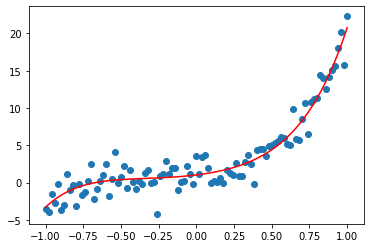

In [4]:
X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)

def model(X,w):
    terms=[]
    for i in range(num_coeffs):
        term=tf.multiply(w[i],tf.pow(X,i))
        terms.append(term)
    return tf.add_n(terms)
w=tf.Variable([0.]*num_coeffs,name="parameters")

y_model=model(X,w)

cost=tf.square(Y-y_model)
train_op=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    for (x,y) in zip(trX,trY):
        sess.run(train_op,feed_dict={X:x,Y:y})

w_val=sess.run(w)
print(w_val)
sess.close()

plt.scatter(trX,trY)
try2=0
for i in range(num_coeffs):
    try2+=w_val[i]*np.power(trX,i)
    
plt.plot(trX,try2,'r')
plt.show()
    

        